<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX08RAEN86-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Building a Machine Learning Pipeline For Natural Language Processing**


Estimated time needed: **90** minutes


Sentiment analysis identifies the emotional tone behind a body of text, in this project we will determine the sentiment of  movie reviews. The  method  will take in a text X and return a label $yhat$ of "1" if the sentiment of the text is positive, "-1" if the sentiment of the text is negative, and "0" for neutral.  We star of with a rule based method, then Machine Learning method with <a href="https://scikit-learn.org/stable/index.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX08RAEN86-2022-01-01">scikit-learn</a> to automatically determine the Sentiment, the dataset is take from <a href="https://nlp.stanford.edu/sentiment/index.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX08RAEN86-2022-01-01">[1]</a>
 


## __Table of Contents__

<ol>
    <li><a href="#Objectives">Objectives</a></li>
    <li>
        <a href="#Setup">Setup</a>
        <ol>
            <li><a href="#Installing-Required-Libraries">Installing Required Libraries</a></li>
            <li><a href="#Importing-Required-Libraries">Importing Required Libraries</a></li>
            <li><a href="#Defining-Helper-Functions">Defining Helper Functions</a></li>
        </ol>
    </li>
    <li>
        <a href="#Background-(optional)">Background (optional)</a>
        <ol>
            <li><a href="#What-does-[Subject-of-the-Lab]-do?">What does [Subject of the Lab] do?</a></li>
            <li><a href="#How-does-[Subject-of-the-Lab]-work?">How does [Subject of the Lab] work?</a></li>
        </ol>
    </li>
    <li><a href="#Example-1---Classification-Problem.--Predicting-the-types-of-Iris-flowers">Example 1: Classification Problem. Predicting the types of Iris flowers</a></li>
    <li><a href="#Example-2---Model-Building.-Application-of-reading-cheques">Example 2: Model Building. Application of reading cheques</a></li>
</ol>

<a href="#Exercises">Exercises</a>
<ol>
    <li><a href="#Exercise-1---Loading-a-dataset-(wine-dataset)">Exercise 1. Loading a dataset (wine dataset)</a></li>
    <li><a href="#Exercise-2---Type-in-Exercise-2-subject-here">Exercise 2. Type in Exercise 2 subject here</a></li>
    <li><a href="#Exercise-3---Type-in-Exercise-3-subject-here">Exercise 3. Type in Exercise 3 subject here</a></li>
</ol>


## Objectives

After completing this lab you will be able to:

 -  Understand Sentiment analysis
 - Understand and Apply Bag-Of-Words and  Term Frequency–Inverse Document Frequency to Sentiment analysis
  - Apply Machine Learning pipe line using  scikit-learn 


----


## Setup


For this lab, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for machine learning and machine-learning-pipeline related 


### Installing Required Libraries


In [1]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"
!mamba install nltk --y


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.4.2) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['nltk']

[+] 0.0s
[+] 0.1s
pkgs/main/linux-64 ━━━━━━━━━━━━━━━╸━━━━━━━━━   0.0 B /  ??.?MB @  ??.?MB

### Importing Required Libraries

_We recommend you import all required libraries in one place (here):_


In [3]:

import warnings

# Specifically target the DeprecationWarning related to np.float and distutils
warnings.filterwarnings("ignore", category=DeprecationWarning, 
                       message=".*np.float is a deprecated alias.*")
warnings.filterwarnings("ignore", category=DeprecationWarning,
                       message=".*distutils Version classes are deprecated.*")

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

from scipy.sparse import dok_matrix
# You can also use this section to suppress warnings generated by your code:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')
warn()


In [4]:
warn()

### Defining Helper Functions

This function will print the class and document dataframe 


In [5]:
def print_sample_and_class(data, class_=1,n_samples=5):

    index=data[data['y']==class_]['X'].index[0:n_samples]

    for i in index:
        print("sample {} of class {}".format(i,class_))
        print(data[data['y']==class_]['X'][i])

# Rule Based Natural Language Processing

Intuitively you would calculate the sentiment of a document by counting the words you associate with a good, neutral or lousy sentiment. This is how rule-based NLP systems work; they follow pre-determined rules to categorize the language it's analyzing. This section will review some basic string operations in pandas and determine the number of predefined words belonging to a specific sentiment to determine the sentiment of a document. 


We load our text data:


In [6]:
df=  pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX08RAEN/sentiment-text-threeclass/train.txt",header=None, sep="\\|\\|\\|",names=['y','X'])
df.head()

,y,X
0,1,The Rock is destined to be the 21st Century '...
1,1,The gorgeously elaborate continuation of `` T...
2,1,Singer\/composer Bryan Adams contributes a sl...
3,0,You 'd think by now America would have had en...
4,1,Yet the act is still charming here .


We see the column ```y``` sentiment and the column ```X``` is the document or sample is the we print the first five sample documents  with the  sentiment and the document:

"1" if the sentiment of the text is positive

"-1" if the sentiment of the text is negative

"0" for neutral  


In [7]:

print_sample_and_class(df, class_=1,n_samples=5)

sample 0 of class 1
 The Rock is destined to be the 21st Century 's new `` Conan '' and that he 's going to make a splash even greater than Arnold Schwarzenegger , Jean-Claud Van Damme or Steven Segal .
sample 1 of class 1
 The gorgeously elaborate continuation of `` The Lord of the Rings '' trilogy is so huge that a column of words can not adequately describe co-writer\/director Peter Jackson 's expanded vision of J.R.R. Tolkien 's Middle-earth .
sample 2 of class 1
 Singer\/composer Bryan Adams contributes a slew of songs -- a few potential hits , a few more simply intrusive to the story -- but the whole package certainly captures the intended , er , spirit of the piece .
sample 4 of class 1
 Yet the act is still charming here .
sample 5 of class 1
 Whether or not you 're enlightened by any of Derrida 's lectures on `` the other '' and `` the self , '' Derrida is an undeniably fascinating and playful fellow .


Each sample in the column "X" corresponds to a Python string 


In [8]:
my_string=df['X'][0]
print("document:",my_string)
print("\n type:",type(my_string))

document:  The Rock is destined to be the 21st Century 's new `` Conan '' and that he 's going to make a splash even greater than Arnold Schwarzenegger , Jean-Claud Van Damme or Steven Segal .

 type: <class 'str'>


We can print out the first 10 characters


In [9]:
my_string[0:10]

' The Rock '

We can split the string into a individual  of words, each word is called a <b>token</b> 


In [10]:
my_string.split()

['The',
 'Rock',
 'is',
 'destined',
 'to',
 'be',
 'the',
 '21st',
 'Century',
 "'s",
 'new',
 '``',
 'Conan',
 "''",
 'and',
 'that',
 'he',
 "'s",
 'going',
 'to',
 'make',
 'a',
 'splash',
 'even',
 'greater',
 'than',
 'Arnold',
 'Schwarzenegger',
 ',',
 'Jean-Claud',
 'Van',
 'Damme',
 'or',
 'Steven',
 'Segal',
 '.']

In python, we can apply different string operations like converting each character  to lowercase:


In [11]:
my_string.casefold()

" the rock is destined to be the 21st century 's new `` conan '' and that he 's going to make a splash even greater than arnold schwarzenegger , jean-claud van damme or steven segal ."

We can apply this operation to every column by using .str attribute followed by the string operations we would like to perform. 


In [12]:
df["X"].str.casefold()

0        the rock is destined to be the 21st century '...
1        the gorgeously elaborate continuation of `` t...
2        singer\/composer bryan adams contributes a sl...
3        you 'd think by now america would have had en...
4                    yet the act is still charming here .
                              ...                        
8539                                      a real snooze .
8540                                       no surprises .
8541     we 've seen the hippie-turned-yuppie plot bef...
8542     her fans walked out muttering words like `` h...
8543                                  in this case zero .
Name: X, Length: 8544, dtype: object

Here we have a list of positive and negative words \:


In [13]:
 # Count the number of "good words" and "bad words" in the text
good_words = ['love', 'good','excellent', 'great','charming']


bad_words = ['hate', 'bad','brutal', 'damnable', 'deplorable', 'detestable', 'disastrous', 'dreadful']

We assign a 1 to the positive sentiment word and a -1  to all the negative sentiment words, then calculate the total for each document and place it in the column score:


In [14]:
df["score"]=0
for bad_word in bad_words:
    df["score"]-=df["X"].str.casefold().str.count(bad_word)

In [15]:

for good_words in good_words:
    df["score"]+=df["X"].str.casefold().str.count(good_words)

We are giving each word a score, one for a  positive sentiment word and a negative one for negative sentiment word. 


In [16]:
df.head()

,y,X,score
0,1,The Rock is destined to be the 21st Century '...,1
1,1,The gorgeously elaborate continuation of `` T...,0
2,1,Singer\/composer Bryan Adams contributes a sl...,0
3,0,You 'd think by now America would have had en...,0
4,1,Yet the act is still charming here .,1


we can print out the document with the highest score:


In [17]:
df.loc[df["score"].argmax(axis=0),'X']

' Good fun , good action , good acting , good dialogue , good pace , good cinematography .'

we can also print out the document with the lowest score:


In [18]:
df.loc[df["score"].argmin(axis=0),'X']

' It is that rare combination of bad writing , bad direction and bad acting -- the trifecta of badness .'

We calculate the score for positive and negative and neural classes 


In [19]:
df.groupby('y').mean()

,score
y,
-1,0.003021
0,0.057882
1,0.106094


we see that the scores are relatively the same. We can also plot a histogram we see for each class most of the samples overlap.


y
-1    AxesSubplot(0.125,0.11;0.775x0.77)
 0    AxesSubplot(0.125,0.11;0.775x0.77)
 1    AxesSubplot(0.125,0.11;0.775x0.77)
Name: score, dtype: object

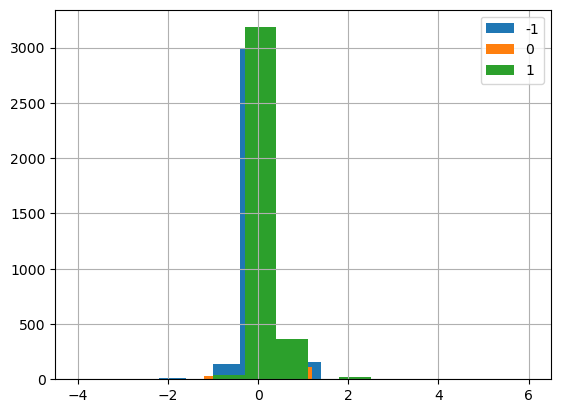

In [20]:
df[["score","y"]].groupby('y')["score"].hist(legend=True)

We create a new column ```yhat``` for the sentiment we will assign each sample to a neutral sentiment:


In [21]:
df['yhat']=0

We can set rule-based thresholds if the score is less than the threshold; we set the sentiment to positive sentiment; similarly, if it's less than the negative of the threshold, we set the sentiment to negative. Anything between we set to neutral. In this case, the threshold is one; you can try different values for thresholds or different rules on your own ;


In [22]:
negative_label=df[['score']].sum(axis=1)<1
pos_label=df[['score']].sum(axis=1)>-1

We assign the class according the the score:


In [23]:
df['yhat'][negative_label]=-1
df['yhat'][pos_label]=1

In [24]:
df['y'].value_counts()

 1    3610
-1    3310
 0    1624
Name: y, dtype: int64

We compare the predicted sentiment with the actual  sentiment, we see the accuracy is not good


In [25]:
np.mean(df['yhat']==df['y'])

0.43562734082397003

There are many reasons why the rule based classifier did not work. The list of words was small the datasets can have thousands of words both positive and negative words; also  we dint have any neutral words. Are scoring methods we use gives a  one for a  positive sentiment word and a negative one for negative sentiment word, maybe some words should be grater then one for  positive sentiment like "amazing" should be 10 and ok  should be 4, similarly some words with negative  sentiment should have large negative values like "barfed " should be "-10" and "boring" should be -4. Maybe  neutral and negative words may have a score for positive sentiment and vise versa. One way to answer these questions is to use machine learning to determine these these scores. 


# Machine Learning

Machine Learning (ML) is a standard tool for NLP tasks. There are many machine learning methods, and in addition, there are many machine learning methods specially built for NLP tasks. We will use multi-class logistic regression via <a href="https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX08RAEN86-2022-01-01"> scikit-learn</a> , a more general approach. We will for two reasons ; first, if you have any experience in Machine learning, you probably have experience with  logistic regression, second  logistic regression can be interpreted as a kind of scoring. The  parameters in this case the scores  are obtained via training or learning, we try different scores called weights for each word until we minimize the miss classified samples. This is done in an optimal way.  It turns out that ML can classify NLP data so well we have to test our method using data we haven seen, we actually have to test it twice on data it has not see, the datasets form 


<b>Training data set</b>
A training data set is a data set of examples used during the learning process and is used to fit the parameters (e.g., weights or scores ) 



<b>Validation data set</b>
A validation data set is a data-set of examples used to tune the hyperparameters  these are related to the learning training and are chose by experimenting 

<b>Test data set</b>
A test data set is a data set that is independent of the training data set and Validation , it basicly how good you model should do in the real world 


In [26]:
train_dataset=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX08RAEN/sentiment-text-threeclass/train.txt",header=None, sep="\\|\\|\\|",names=['y','X']) 
validation_dataset=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX08RAEN/sentiment-text-threeclass/dev.txt",header=None, sep="\\|\\|\\|",names=['y','X']) 
test_dataset =pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX08RAEN/sentiment-text-threeclass/test.txt",header=None, sep="\\|\\|\\|",names=['y','X']) 

## Features



 
Machines, different from humans, cannot comprehend raw text.  Therefore, we have got to transform our content into numbers we denote features for $n-th $ document with the feature vector $\mathbf{x}_n$. The $i-th$ word would be the i-th element in $\mathbf{x}_n$ denoted by  $x_i$ we drop the $n$ for simplicity. The dataset would be the matrix $\mathbf{X}$  where each row corresponds to a document and each column  corresponds to a word  .Lets see how to transform documents into corresponding numerical features:



## Bag-Of-Words 


A bag-Of-Words (BoW) model transforms text into fixed-length vectors; for example, a count if the number of times the word is present in a document or token counts. Scikit-learn's ```CountVectorizer```  is one method to perform BoW transformation; it converts a set of text documents to a matrix of token counts called a document-term matrix (TDM). 
The TDM is a sparse matrix object   ```scipy.sparse.csr_matrix```; where each row represents a different document, and each column represents each word in the document. For each  element in the matrix, represent how many times that word occurs. First we import  ```CountVectorizer``` object:


In [27]:
from sklearn.feature_extraction.text import CountVectorizer

### Toy Example 


let's test it the the following toy corpus:


In [28]:
 corpus = [
    'This is the first of document .',
    'This document is the second document.',
     'And this is the third one.',
     'Is this the first document?' ]

we apply the ```CountVectorizer``` object,the output is the TDM a sparse matrix object:


In [29]:
vectorizer=CountVectorizer()

X_toy = vectorizer.fit_transform(corpus)
X_toy 

<4x10 sparse matrix of type '<class 'numpy.int64'>'
	with 22 stored elements in Compressed Sparse Row format>

we can output the word corresponding to each column 


In [30]:
vectorizer. get_feature_names()

['and',
 'document',
 'first',
 'is',
 'of',
 'one',
 'second',
 'the',
 'third',
 'this']

we can cast the output to a numpy array 


In [31]:
X_toy.toarray()

array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 2, 0, 1, 0, 0, 1, 1, 0, 1],
       [1, 0, 0, 1, 0, 1, 0, 1, 1, 1],
       [0, 1, 1, 1, 0, 0, 0, 1, 0, 1]])

we can convert the output to a datafame. We see the word corresponding to each column and the phrase for each row. 


In [32]:
original_toy_df= pd.DataFrame(X_toy.toarray(),columns=vectorizer.get_feature_names(),index=corpus )
original_toy_df

,and,document,first,is,of,one,second,the,third,this
This is the first of document .,0,1,1,1,1,0,0,1,0,1
This document is the second document.,0,2,0,1,0,0,1,1,0,1
And this is the third one.,1,0,0,1,0,1,0,1,1,1
Is this the first document?,0,1,1,1,0,0,0,1,0,1


For the first document  'This is the first of document .'  would have the featuer $\mathbf{x}_1=[0, 1, 1, 1, 1, 0, 0, 1, 0, 1]$, the second document would be $\mathbf{x}_2=[0, 2, 0, 1, 0, 0, 1, 1, 0, 1]$ and do on


## Training a Model with Grid Search and Logistic Regression 


In this section, let's train a model with Grid Serch and Logistic Regression  first we import the class constructors, you will do a much more simple example in Question 2 where you use default settings of  Logistic Regression


In [33]:
from sklearn.model_selection import PredefinedSplit, GridSearchCV
from sklearn.linear_model import LogisticRegression

The data is pre-split into training and validation data. As we want to determine hyperparameters automatically using  ```GridSearchCV``` we need to combine the datasets together 


In [34]:
dataset=pd.concat([train_dataset,validation_dataset],axis=0)

We can keep track of what samples belong to training a validation by creating a NumPy array where negative ones correspond to training samples, and zeros correspond to validation data. We then use  a predefined scheme using ```PredefinedSplit``` .


In [35]:
from sklearn.model_selection import PredefinedSplit

split_index = [-1]*train_dataset.shape[0] + [0]*validation_dataset.shape[0]
pds = PredefinedSplit(test_fold = split_index)

we create a ```CountVectorizer()``` object and transform the dataset:


In [36]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(dataset['X'])
y=dataset['y']

we do the same for the test dataset


In [37]:
X_test=vectorizer.transform(test_dataset['X'])
y_test=test_dataset[['y']]

We create a dictionary of hyperparameters, the Inverse of regularization strength; and the norm of the penalty. We assume L1 would be better as the data is sparse:


In [38]:
param_grid = {'penalty' : ['l1', 'l2'],'C' : np.logspace(-4, 4, 20)}

We create a We create a ```GridSearchCV``` object , with a logistic regression estimator, the parameter ```cv``` Determines the cross-validation splitting strategy, we use the predefined split. Finely we use the the parameter grid defined above:


In [39]:
clf = GridSearchCV(estimator = LogisticRegression(),cv=pds,param_grid=param_grid)
clf

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
       error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ['l1', 'l2'], 'C': array([1.00000e-04, 2.63665e-04, 6.95193e-04, 1.83298e-03, 4.83293e-03,
       1.27427e-02, 3.35982e-02, 8.85867e-02, 2.33572e-01, 6.15848e-01,
       1.62378e+00, 4.28133e+00, 1.12884e+01, 2.97635e+01, 7.84760e+01,
       2.06914e+02, 5.45559e+02, 1.43845e+03, 3.79269e+03, 1.00000e+04])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

We fit the model and print out the highest accuracy in the validation data and the corresponding best parameter:


In [40]:
clf.fit(X, y)
print("highest accuracy in the validation accuracy ",clf.best_score_)
print("best hyperparameters:",clf.best_params_)


highest accuracy in the validation accuracy  0.6185286103542235
best hyperparameters: {'C': 0.23357214690901212, 'penalty': 'l2'}


We also find the accuracy using the test data  we see it's much higher than the validation data:


In [41]:
print(" best parameters accuracy score :",clf.score(X_test,y_test))

 best parameters accuracy score : 0.6493212669683258


we can find the best model 


In [42]:
model=clf.best_estimator_

and make a prediction 


In [43]:
model.predict(X_test)

array([ 0,  1,  1, ...,  1, -1, -1])

each sample corresponds the predicted class or predicted sentiment.


It turns out the logistic regression is calculating the score using parameters  $w_{ij}$ for the $j$ class

$s_j= \sum_{i=1}^{N} w_{ij}x_i$


The larger $s_j$, the higher the score, and the more likely the sample belongs to that class. As $x_i$ is usually one, a significant $w_{ij}$ means that word is more likely to contribute to that class; if $w_{ij}$ is negative, the more likely that word is not to belong to that class.


 We can determine the words with the largest parameters or score, for each class $j$  we sort the index of each parameter $w_{ij}$ from largest to smallest 


In [44]:
feature_importance=np.argsort(model.coef_)

We find the corresponding vector $x_i$ and then using ```get_feature_names_out()``` to find the word with the highest score 


In [45]:
for class_ in range(3):
    
    print("(j) or y=",class_)
    print(np.array(vectorizer.get_feature_names())[feature_importance[class_,0:10]])
   

(j) or y= 0
['solid' 'best' 'powerful' 'enjoyable' 'fun' 'entertaining' 'hilarious'
 'always' 'human' 'charming']
(j) or y= 1
['screen' 'offers' 'bad' 'crafted' 'imagine' 'watching' 'going'
 'thoroughly' 'humor' 'impressive']
(j) or y= 2
['dull' 'worst' 'bad' 'too' 'suffers' 'mess' 'less' 'flat' 'feels' 'lack']


<b>Question 1 </b>  Create you own ```CountVectorizer``` function


<b>Question 1 a) </b> Create a function that takes the input column of a dataframe ```train_dataset["X"]``` . The  output is a dictionary where each key is a word in the corpus, and the value is a unique digit, then apply the function and call the output ```word_to_idx```


In [49]:
def build_feature_map(X):

    word_types =set()
    #Split string into words usig split() then apply(set) 
    for x in X.str.casefold().str.split().apply(set):
 
    
        word_types=word_types.union(x)
    
    # Create a dictionary keyed by word mapping it to an index
    return   {word: idx for idx, word in enumerate(word_types)}

word_to_idx = build_feature_map(train_dataset["X"].str.lower())

<details>
    <summary>Click here for Solution</summary>

```python
def build_feature_map(X):

    word_types =set()
    #Split string into words usig split() then apply(set) 
    for x in X.str.casefold().str.split().apply(set):
 
    
        word_types=word_types.union(x)
    
    # Create a dictionary keyed by word mapping it to an index
    return   {word: idx for idx, word in enumerate(word_types)}

word_to_idx = build_feature_map(train_dataset["X"]
```

</details>


you can use the following to map the index to the key and the word to the value ```idx_to_word_func = lambda word_to_idx :{v:k for k,v in word_to_idx.items()}```


<b>Question 1 b)</b> write a function that outputs a  TDM given ```train_dataset["X"]``` you can use ```word_to_idx``` as an input, apply the function to ```train_dataset["X"]``` call the result X_train:


In [50]:
def extract_features(word_to_idx, X):
    D=len(word_to_idx)
    N=X.shape[0]
    words=set(word_to_idx.keys())
    
    features = dok_matrix((N, D))
    for row,x in enumerate(X[0:]):
        for word in x.split():
            if word in words:
                features[row,word_to_idx[word.casefold()]]+=1
    return features

X_train= extract_features(word_to_idx, train_dataset["X"])


<details>
    <summary>Click here for Solution</summary>

```python
def extract_features(word_to_idx, X):
    D=len(word_to_idx)
    N=X.shape[0]
    words=set(word_to_idx.keys())
    
    features = dok_matrix((N, D))
    for row,x in enumerate(X[0:]):
        for word in x.split():
            if word in words:
                features[row,word_to_idx[word.casefold()]]+=1
    return features

X_train= extract_features(word_to_idx, train_dataset["X"])
```

</details>


<b>Question 2</b> Create a logistic regression object and train it using the training data. Calculate the score using the validation data and test data 


In [51]:
X_train= extract_features(word_to_idx, train_dataset["X"])
y_train=train_dataset[["y"]]

X_val=extract_features(word_to_idx, validation_dataset["X"])
y_val=validation_dataset[['y']]
X_test=extract_features(word_to_idx, test_dataset["X"])
y_test=test_dataset[['y']]
lr = LogisticRegression()
lr.fit(X_train, y_train)
print("validation accuracy ",lr.score(X_val,y_val))
print("test accuracy ",lr.score(X_test,y_test))

validation accuracy  0.6012715712988193
test accuracy  0.6389140271493212


<details>
    <summary>Click here for Solution</summary>

```python
X_train= extract_features(word_to_idx, train_dataset["X"])
y_train=train_dataset[["y"]]

X_val=extract_features(word_to_idx, validation_dataset["X"])
y_val=validation_dataset[['y']]
X_test=extract_features(word_to_idx, test_dataset["X"])
y_test=test_dataset[['y']]
lr = LogisticRegression()
lr.fit(X_train, y_train)
print("validation accuracy ",lr.score(X_val,y_val))
print("test accuracy ",lr.score(X_test,y_test))
```

</details>


## Bag-Of-Word Hyperparameters 

Bag-Of-Word has several  hyperparameters you can change to improve performance; most have to do with reducing the number of dimensions in the TDM this improves performance,  lets review some


### Stop words


Stop words, which include "and," "the," and "his," are seen to be uninformative in describing the content of a document and may be eliminated sometimes to improve performance. However, removing stop words does not always help with performance, so the  validation data should be used to determine their effectiveness. A list of stop words are available using  Natural Language Toolkit (nltk) we can download the list of stop words as follows:


In [55]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jupyterlab/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


We specify the languish as English. The result is a list of stop words; we can print out the first ten:


In [56]:
print(stopwords.words('english')[0:10])

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an']


we can use the toy data example, we add the list of stop words to the parameter  ```stop_words``` and transform  the data:


In [57]:
vectorizer = CountVectorizer(stop_words=stopwords.words('english'))
X_toy = vectorizer.fit_transform(corpus)

We can compare the TDM with the original TDM with no stop words we see the columns corresponding to ```and```, ```the``` and  ```this```  are missing: 


In [58]:
new_toy_df= pd.DataFrame(X_toy.toarray(),columns=vectorizer.get_feature_names(),index=corpus )
new_toy_df.head()


,document,first,one,second,third
This is the first of document .,1,1,0,0,0
This document is the second document.,2,0,0,1,0
And this is the third one.,0,0,1,0,1
Is this the first document?,1,1,0,0,0


In [59]:
original_toy_df.head()

vectorizer = CountVectorizer(stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(dataset['X'])
X_test=vectorizer.transform(test_dataset['X'])
y_test=test_dataset[['y']]

clf = GridSearchCV(estimator = LogisticRegression(),cv=pds,param_grid=param_grid)

# Fit with all data
clf.fit(X, y)
clf.score(X_test,y_test)

0.6502262443438914

 <b>Exercise </b> - Train a linear regression model using  GridSearchCV  after performing a BoW transform. Find the accuracy on the test data?


<details>
    <summary>Click here for Solution</summary>

```python
vectorizer = CountVectorizer(stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(dataset['X'])
X_test=vectorizer.transform(test_dataset['X'])
y_test=test_dataset[['y']]

clf = GridSearchCV(estimator = LogisticRegression(),cv=pds,param_grid=param_grid)

# Fit with all data
clf.fit(X, y)
clf.score(X_test,y_test)



```

</details>


The next parameter is ```min_df```, which has been set to 5. This corresponds to the minimum number of documents that should contain this feature to be counted. Here we set ```min_df``` to two; this means at least two documents contain the word if it's to be included as a column in the TFM. The reasoning is that if very few documents have the word, it will just add an extra dimension to the TFM  and not be useful for classification. Let's apply it to our toy example and compare it to our original TFM 


In [60]:
min_df=2
vectorizer = CountVectorizer(min_df=min_df)
X_toy = vectorizer.fit_transform(corpus)

In [61]:
new_toy_df= pd.DataFrame(X_toy.toarray(),columns=vectorizer.get_feature_names(),index=corpus )
new_toy_df.head()

,document,first,is,the,this
This is the first of document .,1,1,1,1,1
This document is the second document.,2,0,1,1,1
And this is the third one.,0,0,1,1,1
Is this the first document?,1,1,1,1,1


In [62]:
original_toy_df.head()

,and,document,first,is,of,one,second,the,third,this
This is the first of document .,0,1,1,1,1,0,0,1,0,1
This document is the second document.,0,2,0,1,0,0,1,1,0,1
And this is the third one.,1,0,0,1,0,1,0,1,1,1
Is this the first document?,0,1,1,1,0,0,0,1,0,1


We see that ```one```, ```second```	 and ```third``` are not included as the new TFM as only one document. 


Similarly, if  words are contained in most documents, they may not be useful for classification. Therefore we use  for the ```max_df```, that determines what fraction or number of documents contain a word for it to be disregarded as a column int the TFM . For example if the value is set to 0.9  we should include only those words that occur in a maximum of 90% of all the documents. If the Words  occur in  90% of the documents it's usually not suitable for classification because they do not provide any unique information about the document. Here we set  ```max_df=0.75```


In [63]:
max_df=0.75
vectorizer = CountVectorizer(max_df=0.75)
X_toy = vectorizer.fit_transform(corpus)


we see words like ```is```, ```of``` and ```are ```left out of the TFM:


In [64]:
new_toy_df= pd.DataFrame(X_toy.toarray(),columns=vectorizer.get_feature_names(),index=corpus )
new_toy_df.head()

,and,document,first,of,one,second,third
This is the first of document .,0,1,1,1,0,0,0
This document is the second document.,0,2,0,0,0,1,0
And this is the third one.,1,0,0,0,1,0,1
Is this the first document?,0,1,1,0,0,0,0


## CountVectorizer Gridserch 


We see the ``` CountVectorizer``` has its own set of hyperparameters. We can use ```GridserchCV``` to find them by first creating a pipeline  object. The pipeline object  Sequentially apply a list of transforms and a final estimator. Intermediate steps of the pipeline is a ``` CountVectorizer```,the final estimator


In [65]:
from sklearn.pipeline import Pipeline

The parameter steps takes a  list of tuples of the transforms and a final estimator in sequential order.


In [66]:
pipe = Pipeline(steps=[("CV", CountVectorizer()),  ("LR", LogisticRegression())])

We create a dictionary of hyperparameters; the transform or estimator is the first element of the tuple, then double underscore with the name of the hyperparameter we would like to change. This is followed by the values we would like to try. We try different values for ```min_df```, ```max_df``` and different amount of stop words:


In [67]:
param_grid = {
    "CV__stop_words":[stopwords.words('english')[0:n] for n in range(1,150,50)],
    "CV__min_df":[5**n for n in range(5)],
    "CV__max_df":[0.6,0.9],
    "LR__penalty":["l1", "l2"]
}


We create a We create a ```GridSearchCV``` object , with a ```Pipeline```  object, as before  the parameter cv Determines the cross-validation splitting strategy, we use the predefined split. Finely we use the the parameter grid defined above:


In [68]:
clf = GridSearchCV(pipe, param_grid ,cv=pds)
clf 

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
       error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('CV', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_a...penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'CV__stop_words': [['a'], ['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn'...needn']], 'CV__min_df': [1, 5, 25, 125, 625], 'CV__max_df': [0.6, 0.9], 'LR__p

We fit the dataset, as we need to perform a BOW transform in the pipeline object. We input the original dataframe of documents as an input 


In [69]:
clf.fit(dataset['X'], y)

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
       error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('CV', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_a...penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'CV__stop_words': [['a'], ['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn'...needn']], 'CV__min_df': [1, 5, 25, 125, 625], 'CV__max_df': [0.6, 0.9], 'LR__p

print out the highest accuracy in the validation data and the corresponding best parameter:


In [70]:
print("highest accuracy in the validation",clf.best_score_)
print("best hyperparameters :",clf.best_params_)

highest accuracy in the validation 0.6039963669391463
best hyperparameters : {'CV__max_df': 0.6, 'CV__min_df': 1, 'CV__stop_words': ['a'], 'LR__penalty': 'l2'}


In [71]:
print(" best parameters best parameters accuracy score :",clf.score(test_dataset['X'],y_test))

 best parameters best parameters accuracy score : 0.6520361990950226


# Term Frequency–Inverse Document Frequency (TF–IDF)

The goal of using TF-IDF instead of the raw frequencies of occurrence of a token in a given document is to scale down tokens that occur very frequently in a given corpus and that are hence empirically less informative than features that occur in a small fraction of the training corpus.


## A Toy Example Using TF–IDF


The formula that is used to compute the tf-idf for a term $t$ of a document $d$ in a document set is  $tf-idf(t, d) = tf(t, d) * idf(t)$. Where tf is the term freqency matrix  and the idf is computed as $idf(t) = log [ N / df(t) ] + 1 $. Where $N$is the total number of documents in the document set and $df(t)$ is the document frequency of $t$; the document frequency is the number of documents in the document set that contain the term $t$. The effect of adding “1” to the idf in the equation above is that terms with zero idf, i.e., terms that occur in all documents in a training set, will not be entirely ignored [1]. All the terms are shown here:

t — term (word)

d — document (set of words)

N — count of corpus

corpus — the total document set


We can convert the TFM to a TF–IDF; let's compare the two to have a better idea of what's going on using the toy example. We determine TFM and use the TfidfTransformer  class to recalculate the TF–IDF and plot both as a dataframe.


In [72]:
 corpus

['This is the first of document .',
 'This document is the second document.',
 'And this is the third one.',
 'Is this the first document?']

In [73]:
vectorizer=CountVectorizer()
X_toy = vectorizer.fit_transform(corpus)

In [74]:
tf_dataframe=pd.DataFrame(X_toy.toarray(),index=corpus,columns=vectorizer.get_feature_names())
tf_dataframe

,and,document,first,is,of,one,second,the,third,this
This is the first of document .,0,1,1,1,1,0,0,1,0,1
This document is the second document.,0,2,0,1,0,0,1,1,0,1
And this is the third one.,1,0,0,1,0,1,0,1,1,1
Is this the first document?,0,1,1,1,0,0,0,1,0,1


In [75]:
from sklearn.feature_extraction.text import TfidfTransformer

In [76]:
pd.DataFrame(TfidfTransformer().fit_transform(tf_dataframe).toarray(),index=corpus,columns=vectorizer.get_feature_names())


,and,document,first,is,of,one,second,the,third,this
This is the first of document .,0.000000,0.378357,0.467346,0.309332,0.592769,0.000000,0.000000,0.309332,0.000000,0.309332
This document is the second document.,0.000000,0.687624,0.000000,0.281089,0.000000,0.000000,0.538648,0.281089,0.000000,0.281089
And this is the third one.,0.511849,0.000000,0.000000,0.267104,0.000000,0.511849,0.000000,0.267104,0.511849,0.267104
Is this the first document?,0.000000,0.469791,0.580286,0.384085,0.000000,0.000000,0.000000,0.384085,0.000000,0.384085


Comparing the TFD to TF-IDF, we see words that occur in all documents, like "documents" and "is," are scaled down much more relatively to words like "first," "second," and "third" that only occur in one document 


## TF–IDF for Sentiment Analysis 


We can calculate  TF–IDF using the dataframe directly using ```TfidfVectorizer``` and then train a classifier. Many of the parameters are the same; let's create a pipeline object 


In [77]:

from sklearn.feature_extraction.text import TfidfVectorizer

In [78]:
pipe = Pipeline(steps=[("CV", TfidfVectorizer()),  ("LR", LogisticRegression())])

Many of the hyperparameters of ```TfidfVectorizer``` are the same for ```CountVectorizer``` , therefore we can use the same dictionary of hyperparameters:


In [79]:
param_grid = {
    "CV__stop_words":[stopwords.words('english')[0:n] for n in range(1,150,50)],
    "CV__min_df":[5**n for n in range(5)],
    "CV__max_df":[0.6,0.9],
    "LR__penalty":["l1", "l2"]
}

we crate a ```GridSearchCV``` object 


In [80]:
clf = GridSearchCV(pipe, param_grid ,cv=pds)
clf

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
       error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('CV', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
  ...penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'CV__stop_words': [['a'], ['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn'...needn']], 'CV__min_df': [1, 5, 25, 125, 625], 'CV__max_df': [0.6, 0.9], 'LR__p

we fit the model


In [81]:
clf.fit(dataset['X'], y)

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
       error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('CV', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
  ...penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'CV__stop_words': [['a'], ['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn'...needn']], 'CV__min_df': [1, 5, 25, 125, 625], 'CV__max_df': [0.6, 0.9], 'LR__p

we list the best parameters:


In [82]:
print("highest accuracy in the validation",clf.best_score_)
print("best hyperparameters :",clf.best_params_)

highest accuracy in the validation 0.6276112624886467
best hyperparameters : {'CV__max_df': 0.6, 'CV__min_df': 1, 'CV__stop_words': ['a'], 'LR__penalty': 'l2'}


and the accuracy using test data:


In [83]:
print(" best parameters best parameters accuracy score :",clf.score(test_dataset['X'],y_test))

 best parameters best parameters accuracy score : 0.6570135746606335


# Authors


[Joseph Santarcangelo](author_link) has a Ph.D. in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


### References


<a href="https://nlp.stanford.edu/sentiment/index.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX08RAEN86-2022-01-01">[1]</a>  Stanford Sentiment Treebank


<a href="http://phontron.com/class/anlp2021/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX08RAEN86-2022-01-01">[2]</a>CMU CS 11-711 Advanced NLP


|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2020-07-17|0.1|Sam|Create Lab Template|


Copyright © 2022 IBM Corporation. All rights reserved.
